## K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# importing the data
x=df[['age' ,'fare']]
x.age.fillna(value=x['age'].mean() ,inplace=True)

# scaler
scaler=StandardScaler()
x_scaled =scaler.fit_transform(x)

# perform clustering
model=KMeans(n_clusters=5)
model.fit(x_scaled)

# assign cluster label to the data
df['cluster'] = model.labels_


C:\Users\Afaq khalid\AppData\Local\Temp\ipykernel_15772\2912910970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.age.fillna(value=x['age'].mean() ,inplace=True)
c:\Users\Afaq khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,4
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3


In [7]:
df['cluster'].unique()

array([1, 4, 3, 0, 2])

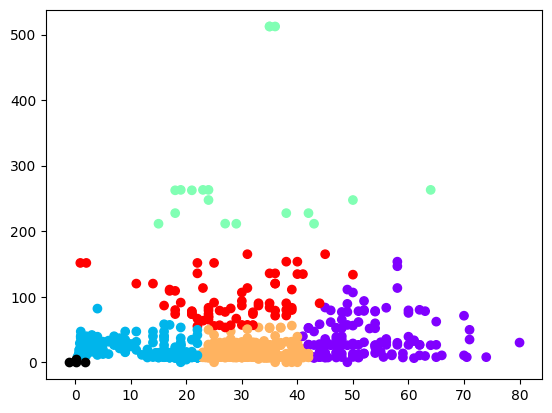

In [12]:
plt.scatter(df['age'] ,df['fare'] ,c=df['cluster'] ,cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black')
plt.show()

In [13]:
import plotly.express as px
fig=px.scatter(df, x='age' ,y='fare' ,color='cluster')
fig.show()

In [14]:
import plotly.express as px
fig=px.scatter_3d(df, x='age' ,z='pclass' ,y='fare' ,color='cluster')
fig.show()

In [15]:
fig=px.parallel_coordinates(df ,color='cluster' ,title='Titanic Cluster')
fig.show()

c:\Users\Afaq khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

